In [1]:
import pandas as pd
import geopandas
import fiona
from matplotlib import pyplot as plt
import seaborn as sn 
import numpy as np

In [2]:
indicator_data=pd.read_csv("indicator_data.csv",encoding="latin_1")
processed_data=pd.read_csv("processed_data.csv",encoding="latin_1")

C:\Users\chenl\AppData\Local\Temp\ipykernel_19056\2365895264.py:2: DtypeWarning: Columns (13,17,19,20,21,26,29,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,120,123,125,127,128,129,131,132,133,134,135,136,137,141,142,143,144,145,146,147,150,151,152,153,154,155,157,158,159,160,162,163,164,165,166,167,168,169,170,171,172,173,174,177,179,180,181,182,183,184,185,186,188,189,190,191,192,204,205,208,209,210,211,212,213,214,215,216,219,220,222,230,232,240,242,250,257,258,259,260,261,262,263,264,265,266,269,270,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374

In [3]:
indicator_processed=pd.DataFrame(indicator_data,columns=["hfias_status","hh_size_members","land_cultivated_ha"]) #this is the column that we are going to use
processed__data=pd.DataFrame(processed_data,columns=["id_country","country","id_proj"])
#select the using data columns in processed_data

In [4]:
food_safety = pd.concat([processed__data,indicator_processed], axis=1)#combine these two data together
food_safety_tz=food_safety.loc[food_safety['id_country'] == 'tz']#select the Tanzania from the data
food_safety_tz["id_proj"].unique() #see the projects' kinds 

array(['cfm', 'cra', 'glv', 'srl'], dtype=object)

In [5]:
class_mapping = {'food_secure':1, 'mildly_fi':2,'moderately_fi':3,'severely_fi':4} #convert string to number
food_safety_tz['hfias_status'] = food_safety_tz['hfias_status'].map(class_mapping)

C:\Users\chenl\AppData\Local\Temp\ipykernel_19056\3071095337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_tz['hfias_status'] = food_safety_tz['hfias_status'].map(class_mapping)


In [6]:
food_safety_tz=food_safety_tz.dropna(subset=['land_cultivated_ha'])#drop the nan value in the land_cultivated_ha column
food_safety_tz=food_safety_tz.loc[food_safety_tz['land_cultivated_ha'] >0] #select the value >0
food_safety_tz=food_safety_tz.dropna(subset=['hh_size_members'])#drop the nan value in the hh_size_number column
food_safety_tz=food_safety_tz.loc[food_safety_tz['hh_size_members'] >0] #select the value >0

In [7]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias = food_safety_tz['hfias_status']

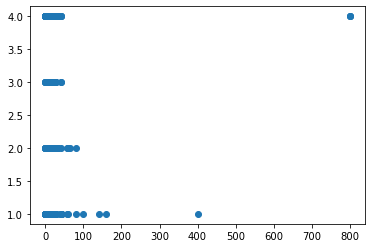

In [8]:
plt.scatter(land_cultivated_data,hfias) # the relationship before cleaning the data

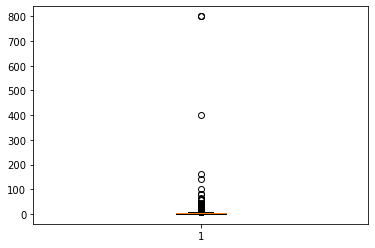

<Figure size 720x504 with 0 Axes>

In [9]:
plt.boxplot(land_cultivated_data)
fig = plt.figure(figsize =(10, 7))
plt.show()

In [10]:
# finding the 1st quartile
q1 = np.quantile(land_cultivated_data, 0.01)

# finding the 3rd quartile
q3 = np.quantile(land_cultivated_data, 0.99)
med = np.median(land_cultivated_data)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3#+(1.5*iqr)
lower_bound = q1#-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


39.07999999999883 39.279999999998836 0.2


In [37]:
outliers = land_cultivated_data[(land_cultivated_data <= lower_bound) | (land_cultivated_data >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:28783      0.1
28786      0.2
28827      0.2
28828      0.1
28836      0.1
         ...  
30541     60.0
30546    100.0
30577     40.0
30578     40.0
30580     40.0
Name: land_cultivated_ha, Length: 89, dtype: float64


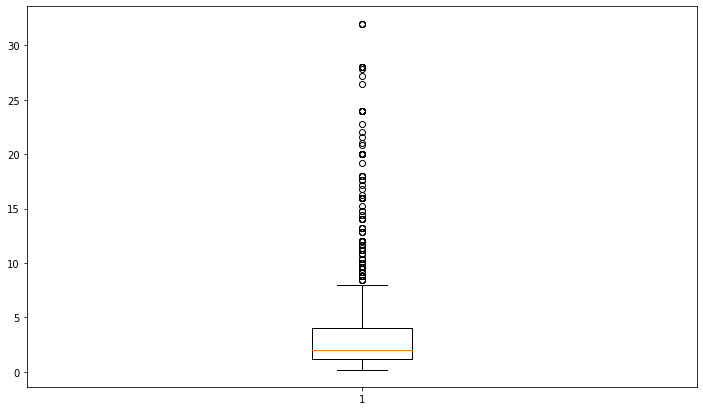

In [38]:
# boxplot of data within the whisker
land_cultivated_data = land_cultivated_data[(land_cultivated_data >= lower_bound) & (land_cultivated_data <= upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(land_cultivated_data)
plt.show()

In [11]:
food_safety_tz=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha'] >= lower_bound)&(food_safety_tz['land_cultivated_ha'] <= upper_bound) ] #select the value based on the previous outliers

In [12]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias = food_safety_tz['hfias_status']
hh_size_members=food_safety_tz['hh_size_members']

### As we can see the data points of 400 and 800 is far beyond the graph, which are outliers that need to be deleted.

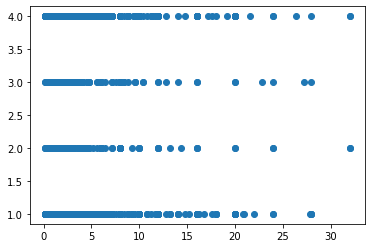

In [13]:
plt.scatter(land_cultivated_data,hfias) # the relationship after cleaning the data

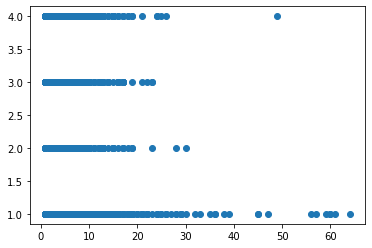

In [14]:
plt.scatter(hh_size_members,hfias) # the relationship before cleaning the data

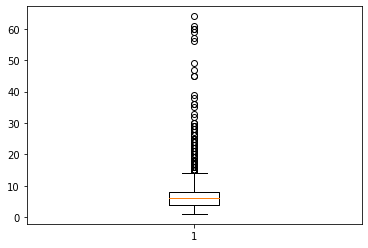

<Figure size 720x504 with 0 Axes>

In [15]:
plt.boxplot(hh_size_members)
fig = plt.figure(figsize =(10, 7))
plt.show()

In [16]:
# finding the 1st quartile
q1 = np.quantile(hh_size_members, 0.01)

# finding the 3rd quartile
q3 = np.quantile(hh_size_members, 0.99)
med = np.median(hh_size_members)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3#+(1.5*iqr)
lower_bound = q1#-(1.5*iqr)
print(iqr, upper_bound, lower_bound)


26.40000000000009 27.40000000000009 1.0


In [17]:
outliers = hh_size_members[(hh_size_members <= lower_bound) | (hh_size_members >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:28776    1
28808    1
28866    1
28874    1
28902    1
        ..
31630    1
31632    1
31635    1
31642    1
31645    1
Name: hh_size_members, Length: 188, dtype: int64


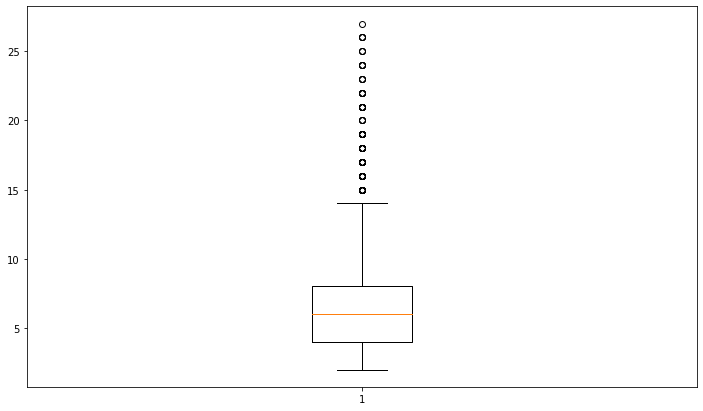

In [18]:
# boxplot of data within the whisker
hh_size_members = hh_size_members[(hh_size_members > lower_bound) & (hh_size_members < upper_bound)]
plt.figure(figsize=(12, 7))
plt.boxplot(hh_size_members)
plt.show()

In [19]:
food_safety_tz=food_safety_tz.loc[(food_safety_tz['hh_size_members'] > lower_bound)&(food_safety_tz['hh_size_members'] < upper_bound) ] #select the value based on the previous outliers

In [20]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias = food_safety_tz['hfias_status']
hh_size_members=food_safety_tz['hh_size_members']

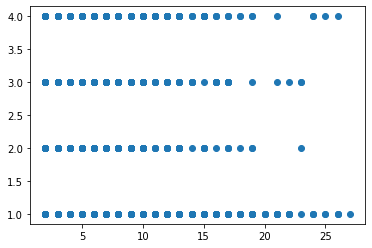

In [21]:
plt.scatter(hh_size_members,hfias) # the relationship before cleaning the data

In [31]:
food_safety_cfm=food_safety_tz.loc[food_safety_tz['id_proj'] == 'cfm']#select the CFM from the data
land_cultivated_data_cfm=food_safety_cfm['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_cfm=food_safety_cfm['hh_size_members']
hfias_hh_cfm = food_safety_cfm['hfias_status']

In [32]:
food_safety_cra=food_safety_tz.loc[food_safety_tz['id_proj'] == 'cra']#select the CRM project from the data
land_cultivated_data_cra=food_safety_cra['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_cra=food_safety_cra['hh_size_members']
hfias_hh_cra = food_safety_cra['hfias_status']

In [33]:
food_safety_glv=food_safety_tz.loc[food_safety_tz['id_proj'] == 'glv']#select the GLV project from the data
land_cultivated_data_glv=food_safety_glv['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_glv=food_safety_glv['hh_size_members']
hfias_hh_glv = food_safety_glv['hfias_status']

In [34]:
food_safety_srl=food_safety_tz.loc[food_safety_tz['id_proj'] == 'srl']#select the SRL project from the data
land_cultivated_data_srl=food_safety_srl['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_srl=food_safety_srl['hh_size_members']
hfias_hh_srl = food_safety_srl['hfias_status']

<AxesSubplot:>

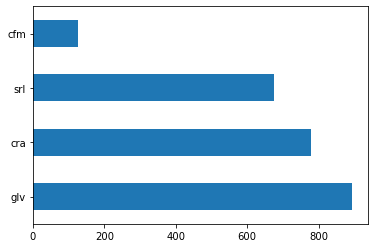

In [115]:
proj=food_safety_tz['id_proj'].value_counts()
proj.plot(kind='barh')

## hh_size for each hfias value 

<AxesSubplot:>

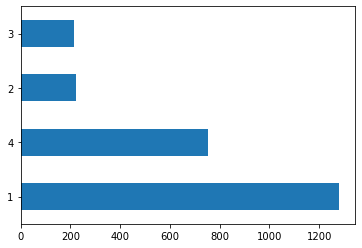

In [45]:
hfias_counts=hfias.value_counts()
hfias_counts.plot(kind='barh')

In [49]:
hfias_counts

1    1281
4     753
2     223
3     216
Name: hfias_status, dtype: int64

<AxesSubplot:>

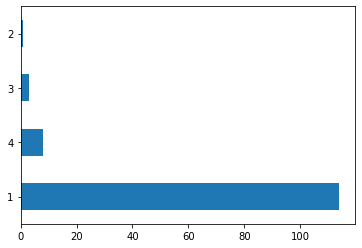

In [46]:
cfm_hfias_counts=hfias_hh_cfm.value_counts()
cfm_hfias_counts.plot(kind='barh')

<AxesSubplot:>

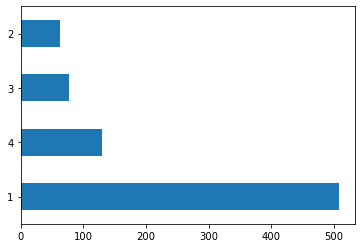

In [47]:
cra_hfias_counts=hfias_hh_cra.value_counts()
cra_hfias_counts.plot(kind='barh')

<AxesSubplot:>

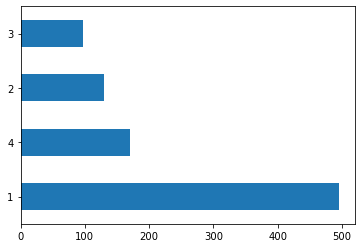

In [48]:
glv_hfias_counts=hfias_hh_glv.value_counts()
glv_hfias_counts.plot(kind='barh')

<AxesSubplot:>

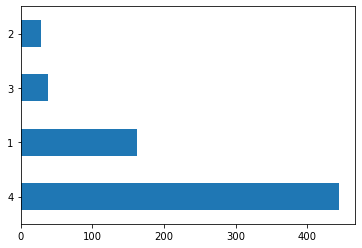

In [50]:
srl_hfias_counts=hfias_hh_srl.value_counts()
srl_hfias_counts.plot(kind='barh')

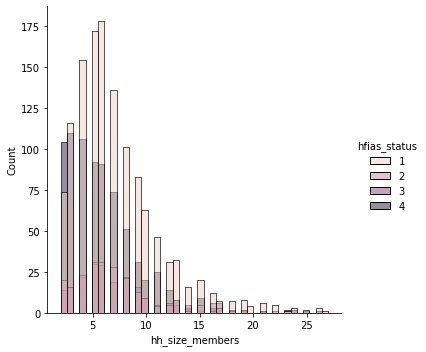

In [58]:
sn.displot(food_safety_tz, x="hh_size_members",hue="hfias_status")

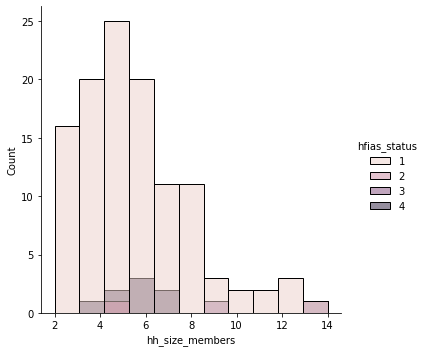

In [59]:
sn.displot(food_safety_cfm, x="hh_size_members",hue="hfias_status")

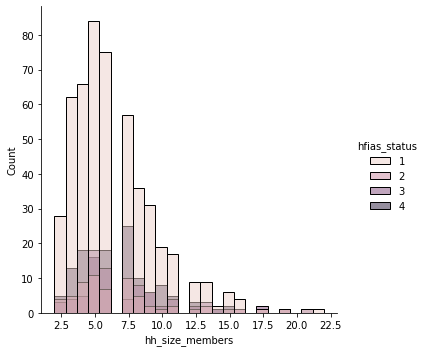

In [60]:
sn.displot(food_safety_cra, x="hh_size_members",hue="hfias_status")

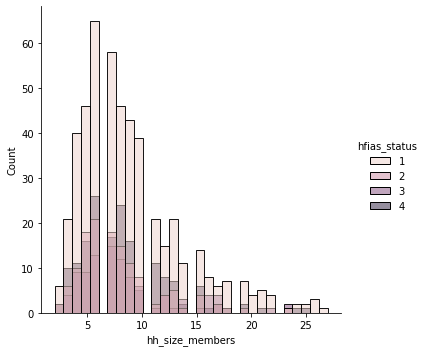

In [61]:
sn.displot(food_safety_glv, x="hh_size_members",hue="hfias_status")

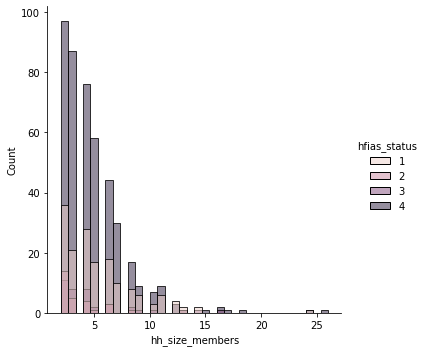

In [62]:
sn.displot(food_safety_srl, x="hh_size_members",hue="hfias_status")

### hfias value=1

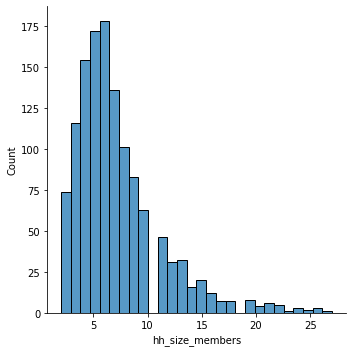

In [26]:
sn.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==1] , x="hh_size_members")

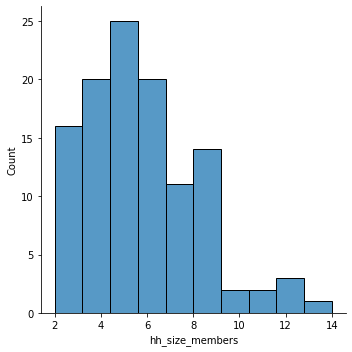

In [51]:
sn.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==1] , x="hh_size_members")

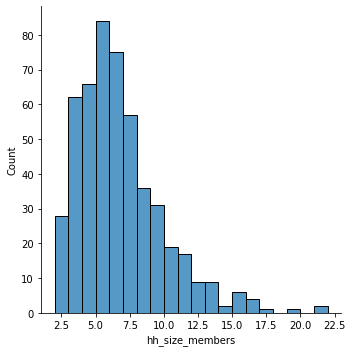

In [53]:
sn.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==1] , x="hh_size_members")

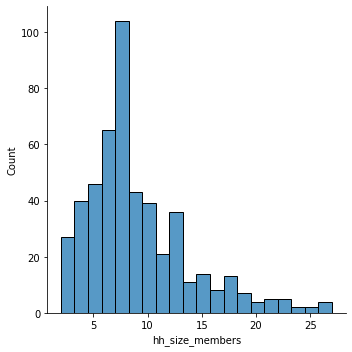

In [54]:
sn.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==1] , x="hh_size_members")

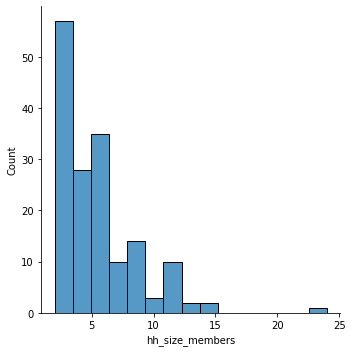

In [55]:
sn.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==1] , x="hh_size_members")

### hfias value=2

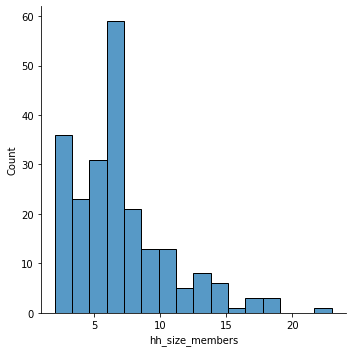

In [23]:
sn.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==2] , x="hh_size_members")

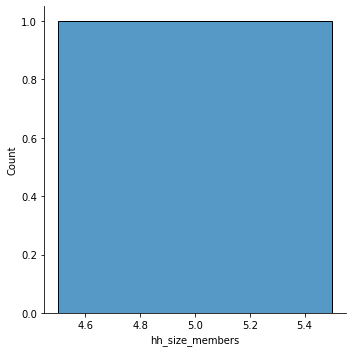

In [63]:
sn.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==2] , x="hh_size_members")

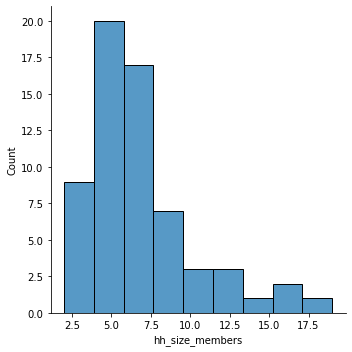

In [68]:
sn.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==2] , x="hh_size_members")

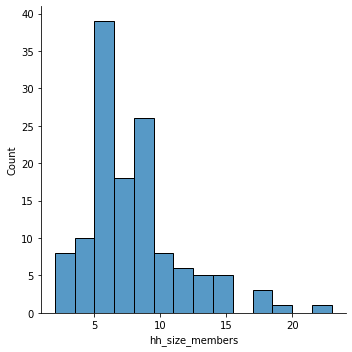

In [67]:
sn.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==2] , x="hh_size_members")

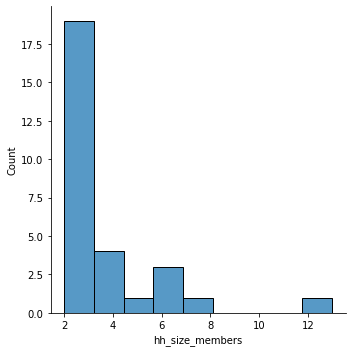

In [69]:
sn.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==2] , x="hh_size_members")

### hfias value=3

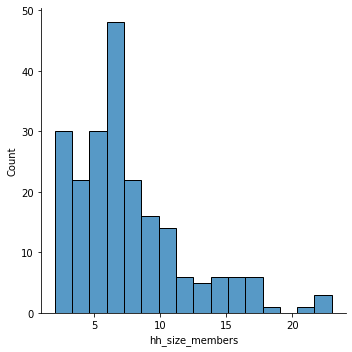

In [24]:
sn.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==3] , x="hh_size_members")

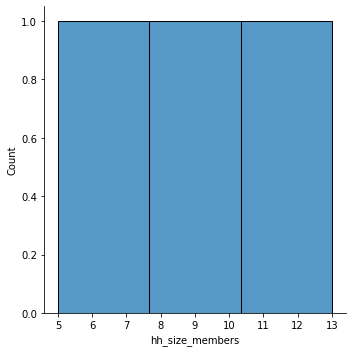

In [70]:
sn.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==3] , x="hh_size_members")

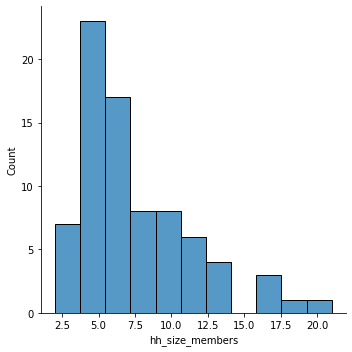

In [71]:
sn.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==3] , x="hh_size_members")

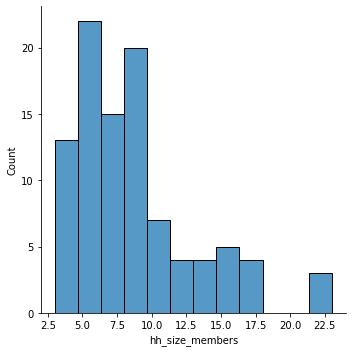

In [72]:
sn.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==3] , x="hh_size_members")

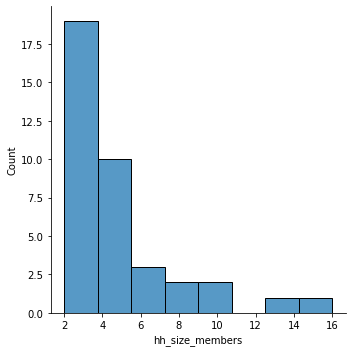

In [73]:
sn.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==3] , x="hh_size_members")

### hfias value=4

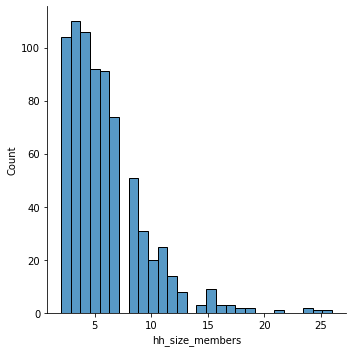

In [25]:
sn.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==4] , x="hh_size_members")

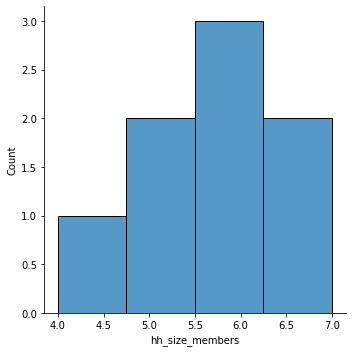

In [74]:
sn.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==4] , x="hh_size_members")

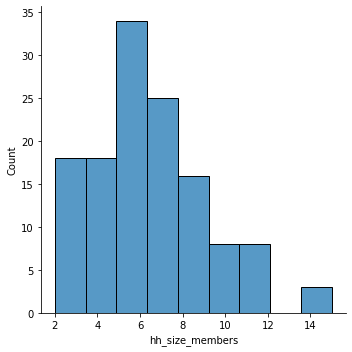

In [75]:
sn.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==4] , x="hh_size_members")

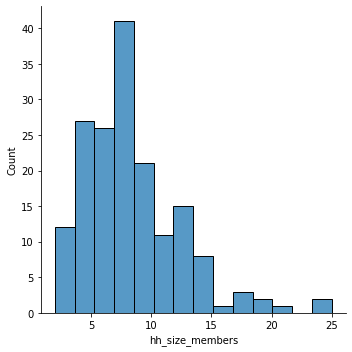

In [77]:
sn.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==4] , x="hh_size_members")

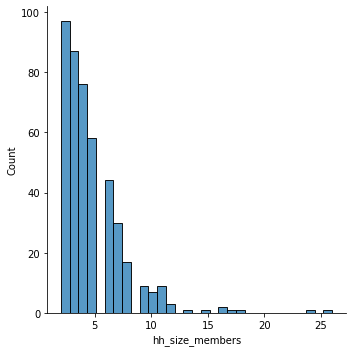

In [78]:
sn.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==4] , x="hh_size_members")

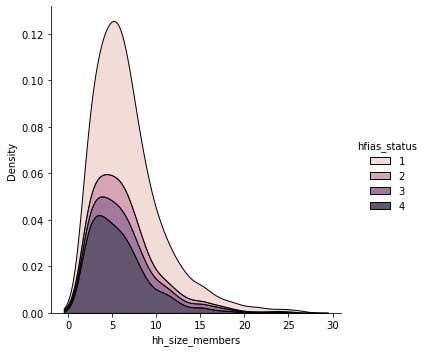

In [30]:
sn.displot(food_safety_tz, x="hh_size_members", hue="hfias_status", kind="kde", multiple="stack")

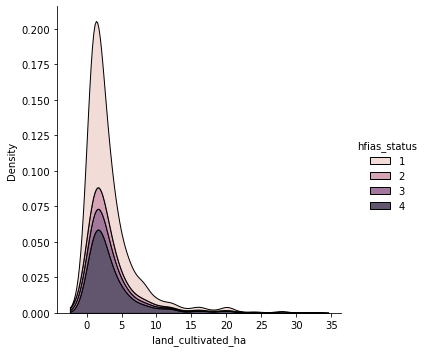

In [112]:
sn.displot(food_safety_tz, x="land_cultivated_ha", hue="hfias_status", kind="kde", multiple="stack")

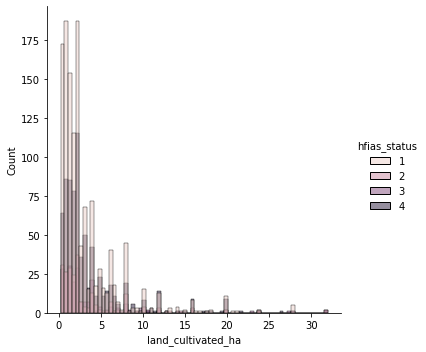

In [82]:
sn.displot(food_safety_tz, x=" land_cultivated_ha",hue="hfias_status")

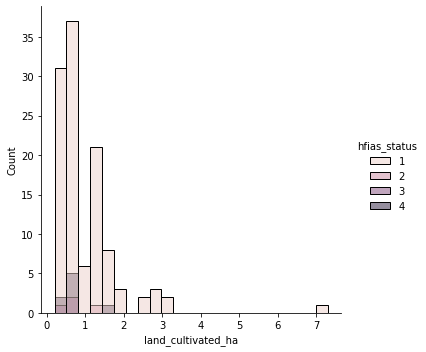

In [83]:
sn.displot(food_safety_cfm, x="land_cultivated_ha",hue="hfias_status")

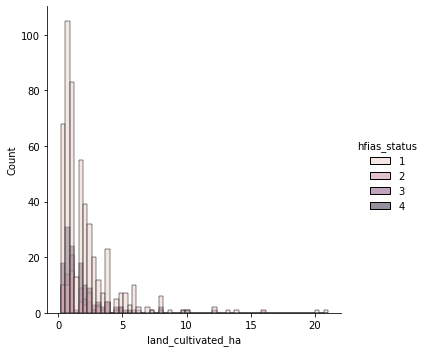

In [85]:
sn.displot(food_safety_cra, x="land_cultivated_ha",hue="hfias_status")

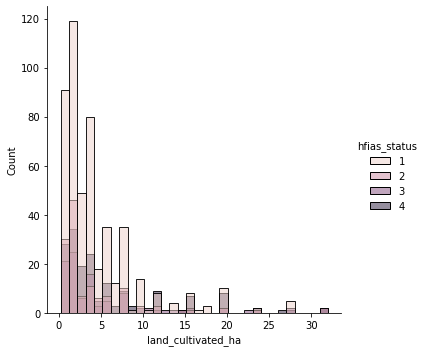

In [86]:
sn.displot(food_safety_glv, x="land_cultivated_ha",hue="hfias_status")

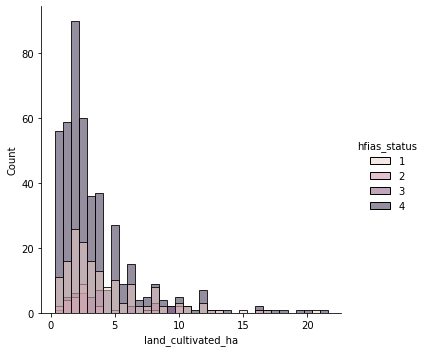

In [88]:
sn.displot(food_safety_srl, x="land_cultivated_ha",hue="hfias_status")

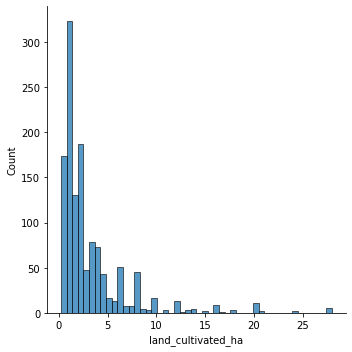

In [89]:
sn.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==1] , x="land_cultivated_ha")

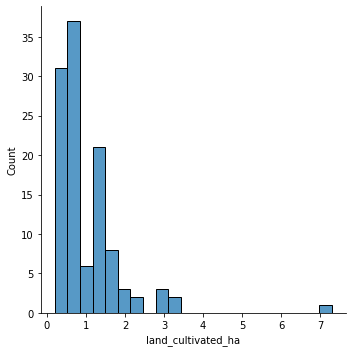

In [91]:
sn.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==1] , x="land_cultivated_ha")

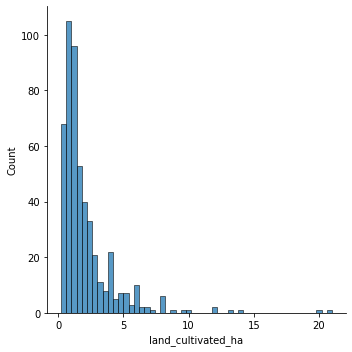

In [92]:
sn.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==1] , x="land_cultivated_ha")

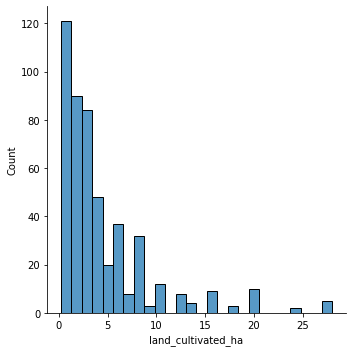

In [93]:
sn.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==1] , x="land_cultivated_ha")

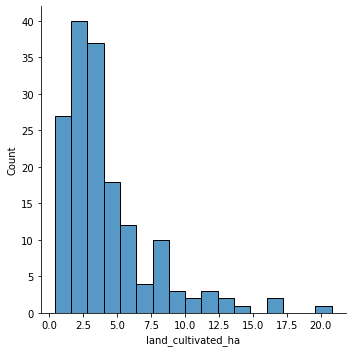

In [94]:
sn.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==1] , x="land_cultivated_ha")

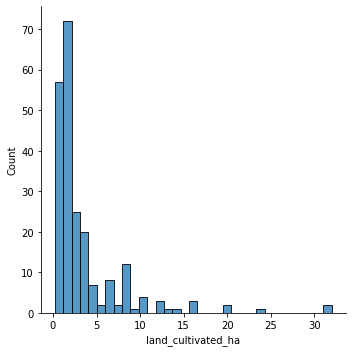

In [95]:
sn.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==2] , x="land_cultivated_ha")

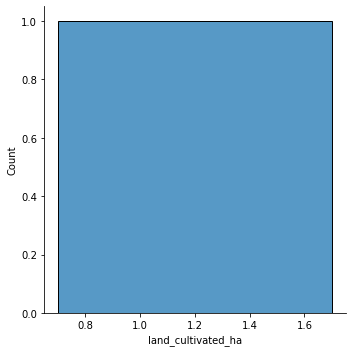

In [98]:
sn.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==2] , x="land_cultivated_ha")

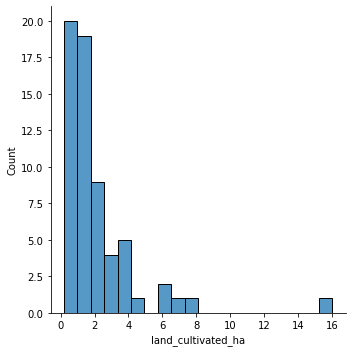

In [99]:
sn.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==2] , x="land_cultivated_ha")

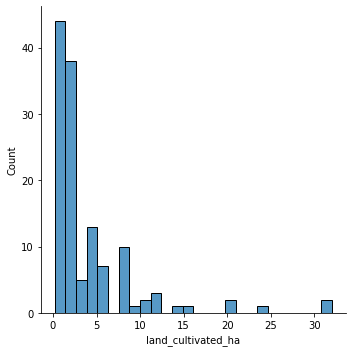

In [100]:
sn.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==2] , x="land_cultivated_ha")

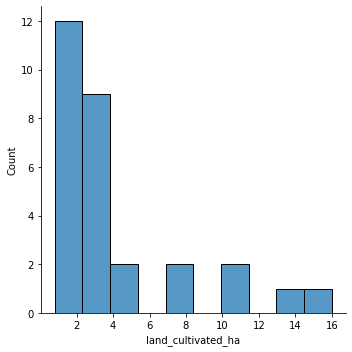

In [101]:
sn.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==2] , x="land_cultivated_ha")

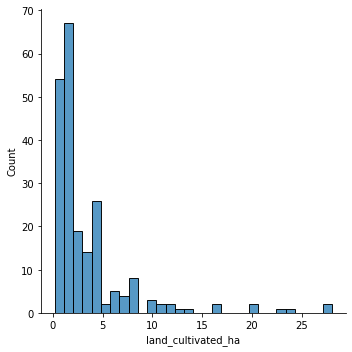

In [102]:
sn.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==3] , x="land_cultivated_ha")

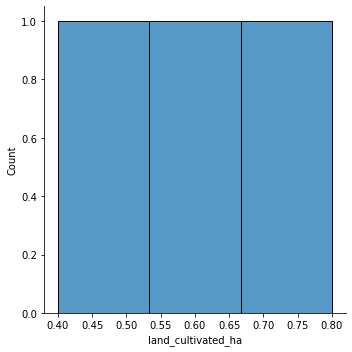

In [103]:
sn.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==3] , x="land_cultivated_ha")

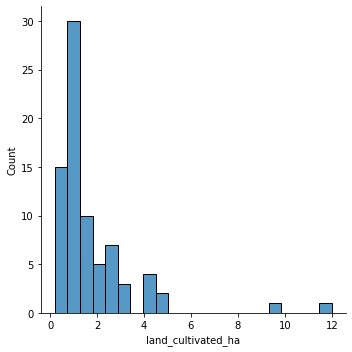

In [104]:
sn.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==3] , x="land_cultivated_ha")

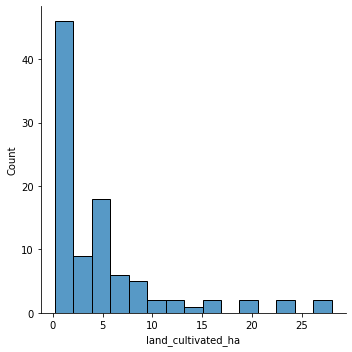

In [105]:
sn.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==3] , x="land_cultivated_ha")

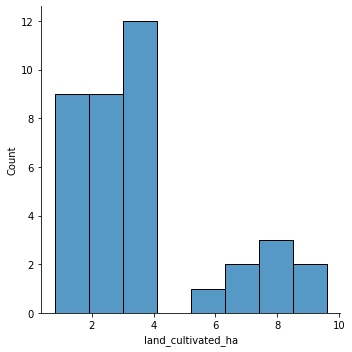

In [106]:
sn.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==3] , x="land_cultivated_ha")

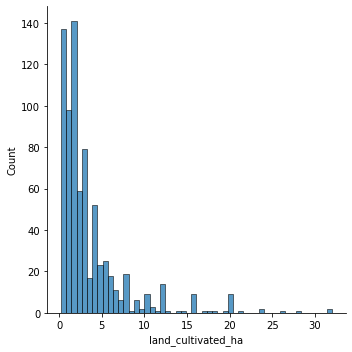

In [107]:
sn.displot(food_safety_tz.loc[food_safety_tz['hfias_status']==4] , x="land_cultivated_ha")

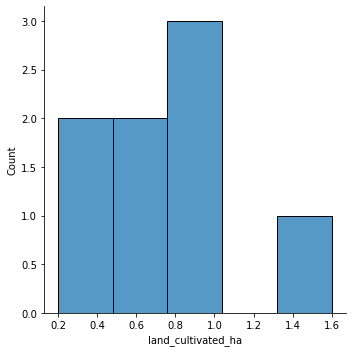

In [108]:
sn.displot(food_safety_cfm.loc[food_safety_cfm['hfias_status']==4] , x="land_cultivated_ha")

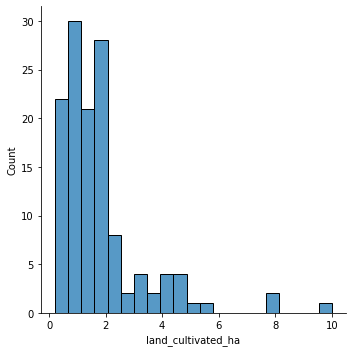

In [109]:
sn.displot(food_safety_cra.loc[food_safety_cra['hfias_status']==4] , x="land_cultivated_ha")

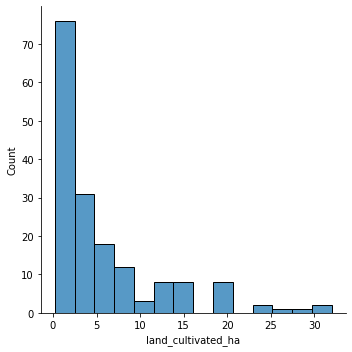

In [110]:
sn.displot(food_safety_glv.loc[food_safety_glv['hfias_status']==4] , x="land_cultivated_ha")

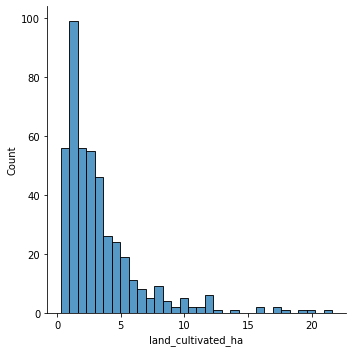

In [111]:
sn.displot(food_safety_srl.loc[food_safety_srl['hfias_status']==4] , x="land_cultivated_ha")